# Desafios Aula 01

## Lendo os dados do MovieLens

In [0]:
import pandas as pd

filmes = pd.read_csv('http://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv')

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")


## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
notas_medias_por_filme = avaliacoes.groupby("movieId")["rating"].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on="movieId")
filmes_sem_avaliacoes = filmes_com_media[filmes_com_media.isnull().any(axis=1)]
print("Total de filmes não avaliados:", filmes_sem_avaliacoes["movieId"].count(), "\n")
filmes_sem_avaliacoes.sort_values('title')['title']


Total de filmes não avaliados: 18 



5957                    Browning Version, The (1951)
5837                       Call Northside 777 (1948)
7565                              Chalet Girl (2011)
4037                              Chosen, The (1981)
2587    Color of Paradise, The (Rang-e khoda) (1999)
2499                          For All Mankind (1989)
3118                  I Know Where I'm Going! (1945)
5749              In the Realms of the Unreal (2004)
816                            Innocents, The (1961)
5452                     Mutiny on the Bounty (1962)
2211                                  Niagara (1953)
5020                       Parallax View, The (1974)
4704                                    Proof (1991)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
5421                    Roaring Twenties, The (1939)
4598                                  Scrooge (1970)
5293                        This Gun for Hire (1942)
5824                        Twentieth Century (1934)
Name: title, dtype: object

## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [0]:
filmes_com_media = filmes_com_media.rename(columns={'rating': 'notaMédia'})
filmes_com_media.sort_values("notaMédia", ascending=False).head(15)

,movieId,title,genres,notaMédia
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.00
8107,100556,"Act of Killing, The (2012)",Documentary,5.00
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.00
9094,143511,Human (2015),Documentary,5.00
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.00
4251,6201,Lady Jane (1986),Drama|Romance,5.00
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.00
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.00
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.00
9122,145994,Formula of Love (1984),Comedy,5.00


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
print("Total de votos por filmes \n")
total_avaliacoes_por_filmes = avaliacoes.groupby("movieId")['rating'].count()
filmes_total_notas = filmes_com_media.join(total_avaliacoes_por_filmes, on="movieId")
filmes_total_notas = filmes_total_notas.rename(columns={'rating': 'total_votos'})
filmes_total_notas.sort_values('total_votos', ascending=False).head(10)


Total de votos por filmes 



,movieId,title,genres,notaMédia,total_votos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.00
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.00
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.00
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.00
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.00
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251.00
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238.00
97,110,Braveheart (1995),Action|Drama|War,4.03,237.00
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224.00
461,527,Schindler's List (1993),Drama|War,4.22,220.00


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
filmes_total_notas['notaMédia'] = filmes_total_notas['notaMédia'].round(2)
filmes_total_notas.head(5)

,movieId,title,genres,notaMédia,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.00
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.00
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.00
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.00
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.00


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [0]:
generos_filmes = filmes_total_notas.genres.str.get_dummies('|')
generos = generos_filmes.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [0]:
total_filmes_por_genero = filmes_total_notas.genres.str.get_dummies('|').sum()
total_filmes_por_genero.sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

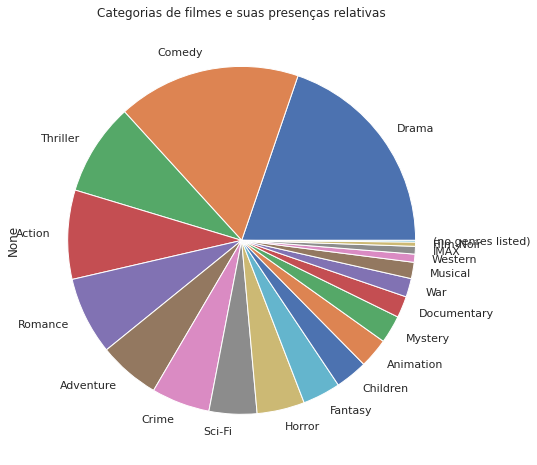

In [0]:
import matplotlib.pyplot as plt
filmes["genres"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de filmes e suas presenças relativas',
    figsize=(8,8))
plt.show()

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

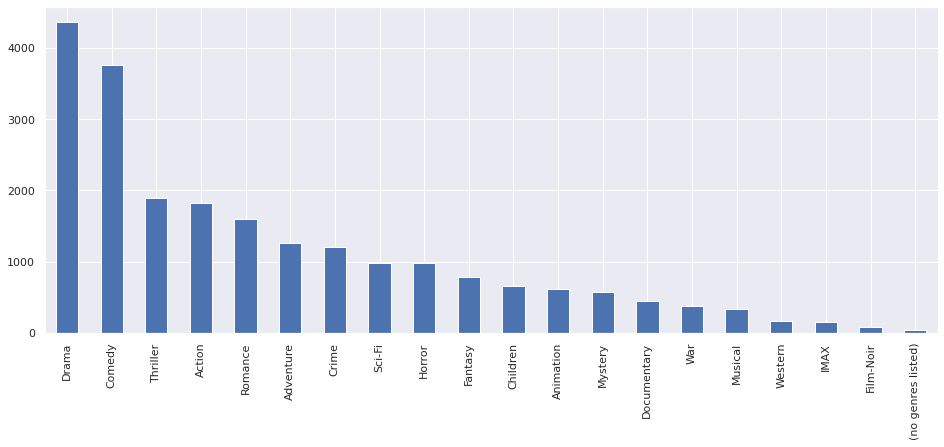

In [0]:
total_filmes_por_genero.sort_values(ascending=False).plot(kind='bar', figsize=(16, 6))

# Desafios Aula 02

##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

*// solução encontrada em: http://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib*

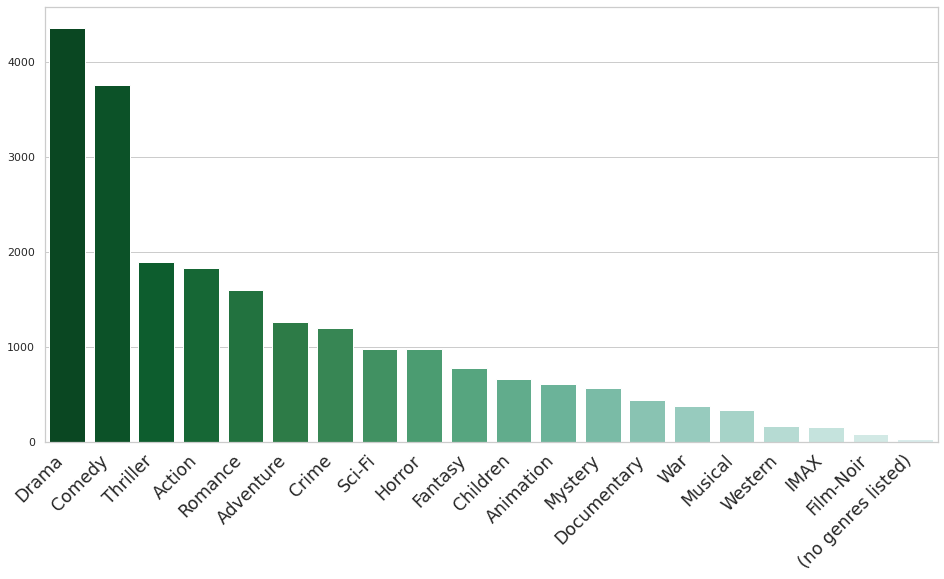

In [0]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["genres"].str.get_dummies('|').sum().sort_values(ascending=False)

plt.figure(figsize=(16,8))

sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"movieId=={n}")["rating"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

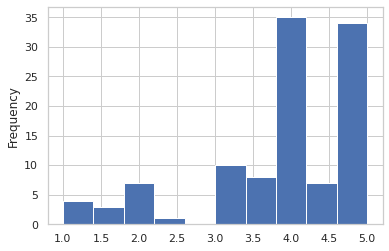

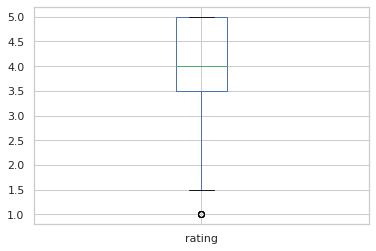

count   109.00
mean      3.89
std       1.10
min       1.00
25%       3.50
50%       4.00
75%       5.00
max       5.00
Name: rating, dtype: float64

In [0]:
plot_filme(924) # 2001: A Space Odyssey (1968)

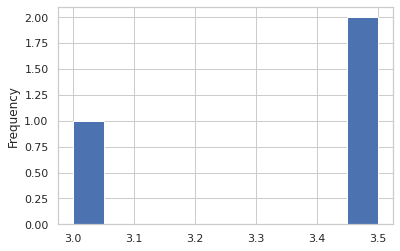

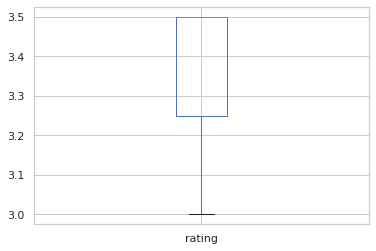

count   3.00
mean    3.33
std     0.29
min     3.00
25%     3.25
50%     3.50
75%     3.50
max     3.50
Name: rating, dtype: float64

In [0]:
plot_filme(6002)

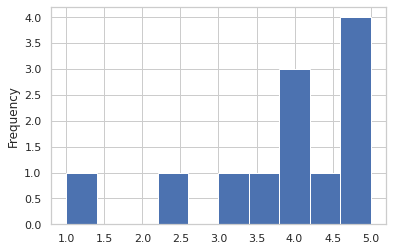

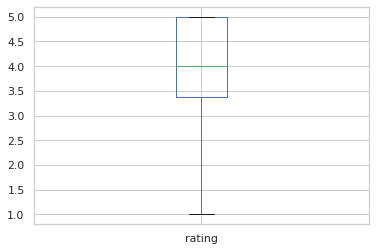

count   12.00
mean     3.88
std      1.23
min      1.00
25%      3.38
50%      4.00
75%      5.00
max      5.00
Name: rating, dtype: float64

In [0]:
plot_filme(187593)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

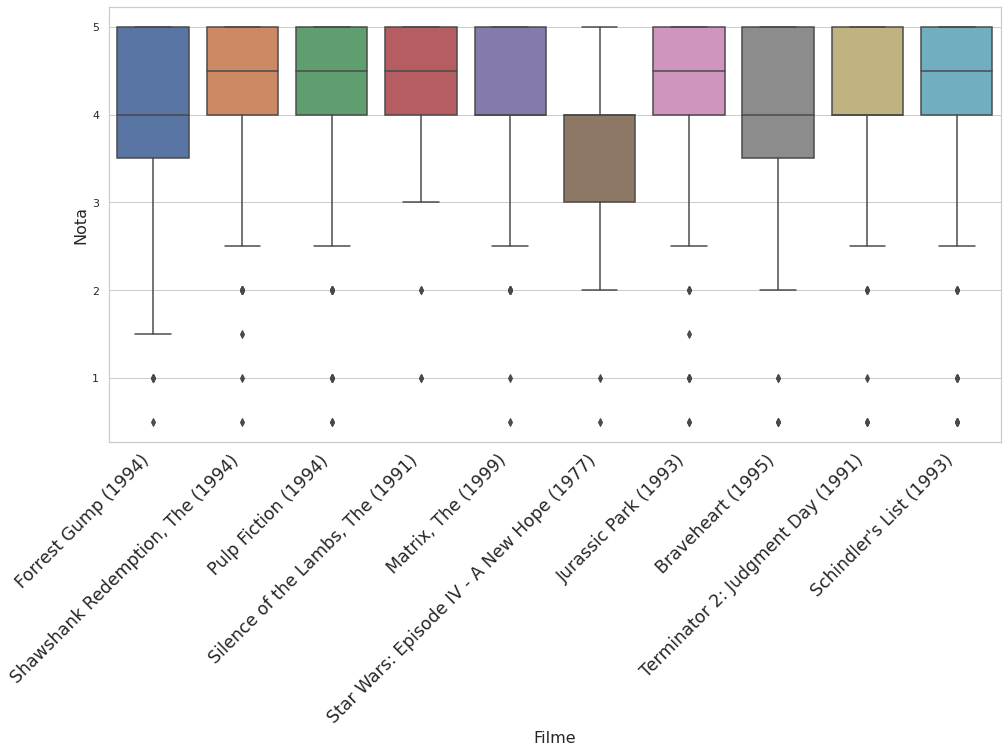

In [0]:
top_10_votos_por_filme = filmes_total_notas.sort_values('total_votos', ascending=False).head(10)
top_10_votos_por_filme_titulos = top_10_votos_por_filme['title'].to_list()
top_10_votos_por_filme_ids = top_10_votos_por_filme['movieId'].to_list()

plt.figure(figsize=(16,8))

chart = sns.boxplot(data = avaliacoes.query(f"movieId in {top_10_votos_por_filme_ids}"), x ="movieId", y="rating")

chart.set_xticklabels(top_10_votos_por_filme_titulos, fontsize=12)
chart.set_xlabel("Filme", fontsize=16)
chart.set_ylabel("Nota", fontsize=16)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

<function matplotlib.pyplot.show>

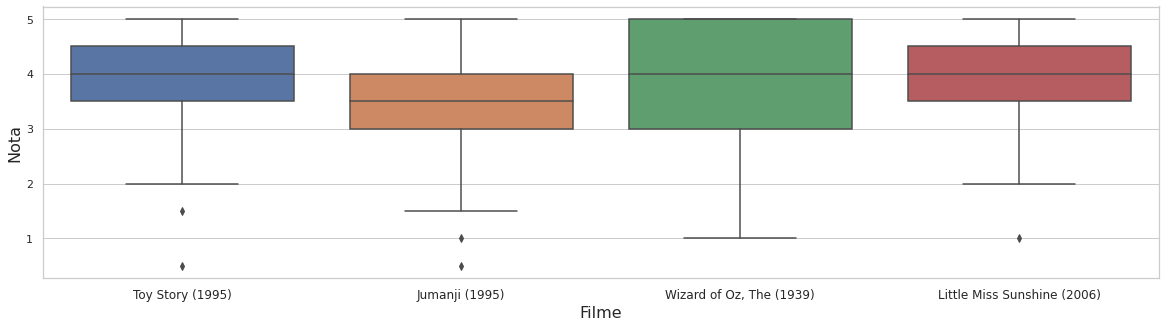

In [0]:
avaliacoes_para_boxplot = avaliacoes.query("movieId in [1,2,919,46578]").sort_values('movieId', ascending=True)
titulos_para_boxplot = filmes.query("movieId in [1,2,919,46578]").sort_values('movieId', ascending=True)["title"]
plt.figure(figsize=(20,5))
chart = sns.boxplot(data = avaliacoes_para_boxplot, x ="movieId", y="rating")
chart.set_xticklabels(titulos_para_boxplot, fontsize=12, verticalalignment='top')
chart.set_xlabel("Filme", fontsize=16)
chart.set_ylabel("Nota", fontsize=16)
plt.show

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
def stats_movie(id):
    filme = filmes.query(f'movieId == {id}')
    notas = avaliacoes.query(f'movieId == {id}')['rating']
    
    print(f'Filme: {filme.iloc[0, 1]}') 
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')
    print(f'Moda: {notas.mode().values}')   
    print('------------')

stats_movie(2540)
stats_movie(89386)
stats_movie(46578)

Filme: Corruptor, The (1999)
Média: 2.5
Mediana: 2.5
Moda: [2.  2.5 3. ]
------------
Filme: Pearl Jam Twenty (2011)
Média: 0.5
Mediana: 0.5
Moda: [0.5]
------------
Filme: Little Miss Sunshine (2006)
Média: 3.883116883116883
Mediana: 4.0
Moda: [4.]
------------


In [0]:
stats_movie(919)
stats_movie(999)
stats_movie(179749)

Filme: Wizard of Oz, The (1939)
Média: 3.880434782608696
Mediana: 4.0
Moda: [5.]
------------
Filme: 2 Days in the Valley (1996)
Média: 3.0416666666666665
Mediana: 3.0
Moda: [3.]
------------
Filme: Creep 2 (2017)
Média: 1.5
Mediana: 1.5
Moda: [1.5]
------------


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

// solução encontrada em: http://kite.com/python/answers/how-to-plot-two-matplotlib-plots-side-by-side-in-python

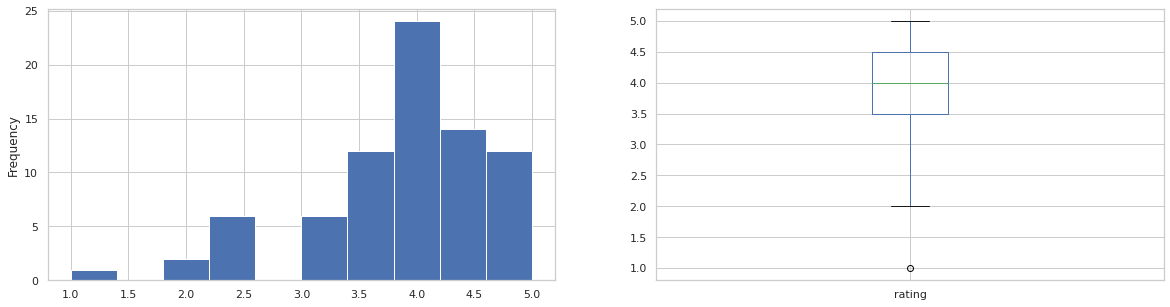

In [0]:
def plot_movie_side(n):
  notas_do_filme = avaliacoes.query(f"movieId=={n}")["rating"]
  plt.figure(figsize=(20,5))
  plt.subplot(1, 2, 1)
  notas_do_filme.plot(kind='hist')
  plt.subplot(1, 2, 2)
  notas_do_filme.plot.box()
  plt.show()

plot_movie_side(46578)


## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

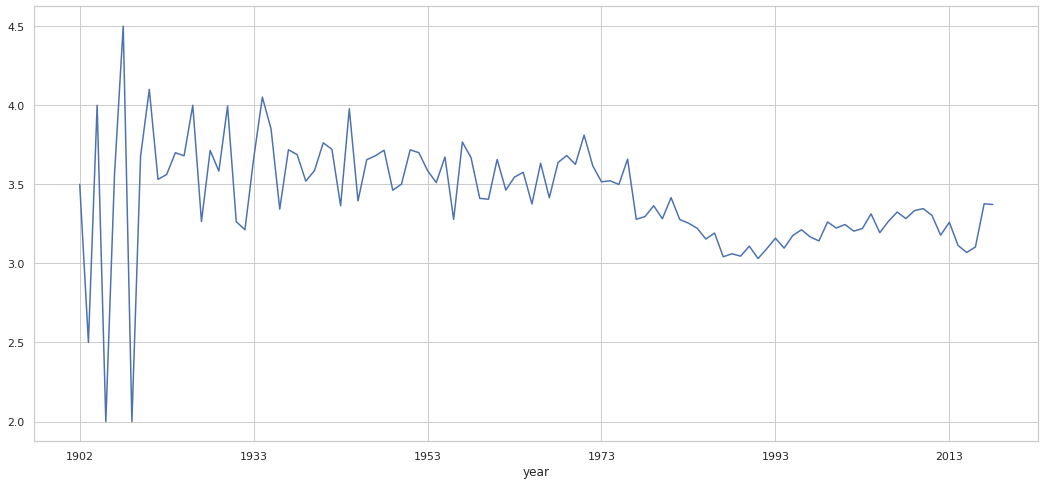

In [0]:
medias_avaliacoes_filmes_por_ano = filmes_com_media.copy()
medias_avaliacoes_filmes_por_ano['year'] = medias_avaliacoes_filmes_por_ano['title'].str.extract("\((\d{4})\)")
avaliacao_media_filme_ano = medias_avaliacoes_filmes_por_ano.groupby('year')['notaMédia'].mean()
plt.figure(figsize=(18, 8))
avaliacao_media_filme_ano.plot()

# Desafios Aula 03

## Lendo os Dados do IMDB

In [0]:
import pandas as pd
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

<function matplotlib.pyplot.show>

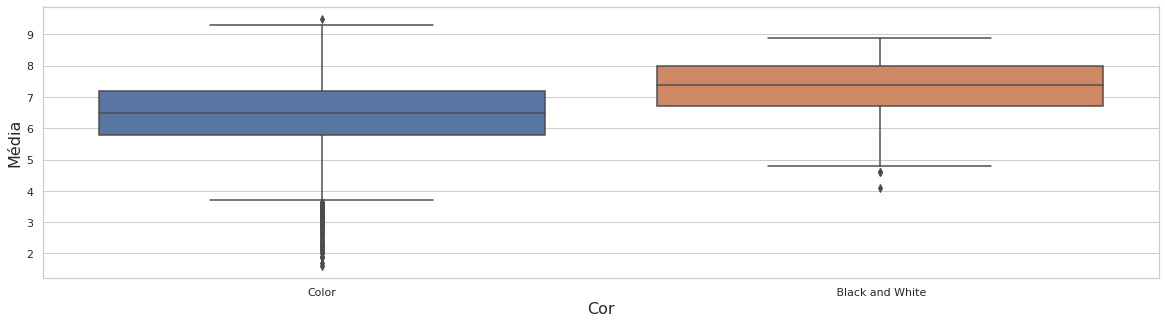

In [0]:
filmes_coloridos_preto_branco = imdb.query("color in ['Color', ' Black and White']")
plt.figure(figsize=(20,5))
chart = sns.boxplot(data = filmes_coloridos_preto_branco, x ="color", y="imdb_score")
chart.set_xlabel("Cor", fontsize=16)
chart.set_ylabel("Média", fontsize=16)
plt.show

Os filmes em preto e branco são classicos que tendem a ter nota média mais alto por ser assistido por poucos cinefilos.

##Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

O filme com muito custo e prejuizo é: John Carter  2012 Andrew Stanton 

Renda (bilheteria): 73,058,679.0 

Custo (orçamento): 263,700,000.0 

Lucro (prejuizo): -190,641,321.0 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<function matplotlib.pyplot.show>

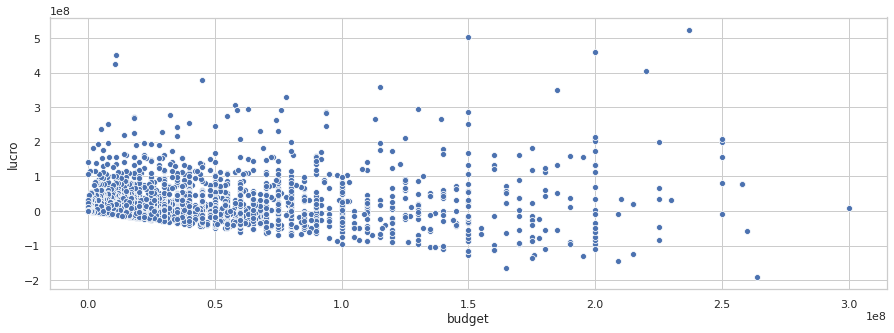

In [0]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
budget_gross = imdb_usa.query("budget > 0 | gross > 0")[["budget", "lucro"]].dropna()

filme_caro_prejuizo = imdb_usa.query("budget > 2.5 | lucro < -1").sort_values("lucro", ascending=True).head(1)
titulo_filme_prejuizo = filme_caro_prejuizo.iloc[0]["movie_title"]
ano_filme_prejuizo = "{:.0f}".format(filme_caro_prejuizo.iloc[0]["title_year"])
diretor_filme_prejuizo = filme_caro_prejuizo.iloc[0]["director_name"]

print("O filme com muito custo e prejuizo é:", titulo_filme_prejuizo, ano_filme_prejuizo, diretor_filme_prejuizo, "\n")
print("Renda (bilheteria):", "{:,}".format(filme_caro_prejuizo.iloc[0]["gross"]), "\n")
print("Custo (orçamento):", "{:,}".format(filme_caro_prejuizo.iloc[0]["budget"]), "\n")
print("Lucro (prejuizo):", "{:,}".format(filme_caro_prejuizo.iloc[0]["lucro"]), "\n")

plt.figure(figsize=(15,5))
sns.scatterplot(x="budget", y="lucro", data = budget_gross)
plt.show

##Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)


Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

Lucros ou prejuizos dos filmes mais recentes: 



<function matplotlib.pyplot.show>

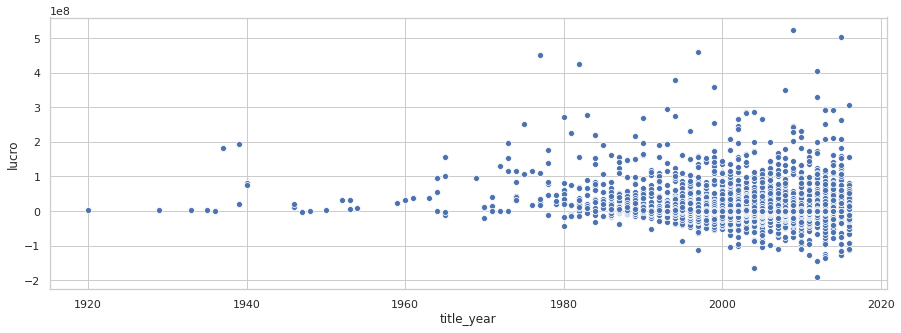

In [0]:
lucros_filmes = imdb_usa[["title_year", "lucro"]].dropna()

print("Lucros ou prejuizos dos filmes mais recentes:", "\n")

plt.figure(figsize=(15,5))

sns.scatterplot(x="title_year", y="lucro", data = lucros_filmes)

plt.show

Os filmes mais recentes com altos orçamentos tendem a igualar o lucro ao gasto no mercado americano (que restringimos a analise) e aumentar a renda em outros paises. Os filmes com lucro baixo tendem a ter baixo orçamento de divulgação.  

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

Filmes da decada pré 2° guerra que tiveram muito lucro: 



,movie_title,lucro
3970,Gone with the Wind,"194,678,278.00"
4449,Snow White and the Seven Dwarfs,"182,925,485.00"


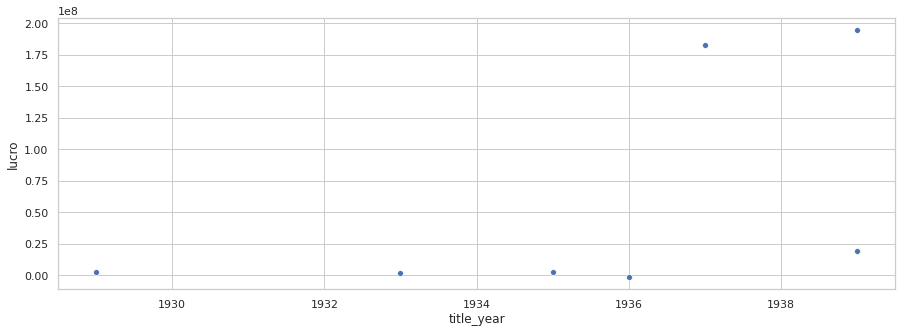

In [0]:
filmes_pre_segunda_guerra = imdb_usa.query("title_year <= 1939").dropna().sort_values("lucro", ascending=False)

lucros_filmes_pre_segunda_guerra = filmes_pre_segunda_guerra.query("lucro >= 100000000").dropna().sort_values("lucro", ascending=False)

plt.figure(figsize=(15,5))

sns.scatterplot(x="title_year", y="lucro", data = filmes_pre_segunda_guerra)

print("Filmes da decada pré 2° guerra que tiveram muito lucro:", "\n")

lucros_filmes_pre_segunda_guerra[['movie_title', 'lucro']]

Branca de Neve e os Sete Anões (1937) ... E o Vento Levou (1939)

## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

O diretor estranho com muitos filmes de baixa bilheteria é: Woody Allen 



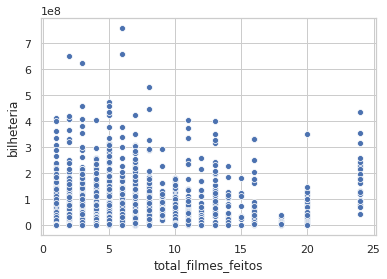

In [0]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["bilheteria", "total_filmes_feitos"]
gross_director = gross_director.reset_index()
sns.scatterplot(x="total_filmes_feitos", y="bilheteria", data = gross_director)

diretor_estranho = gross_director.query("total_filmes_feitos == 18").dropna().sort_values("bilheteria", ascending=True).head(1)

diretor_estranho = diretor_estranho.iloc[0]["director_name"]

print("O diretor estranho com muitos filmes de baixa bilheteria é:", diretor_estranho, "\n")


## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

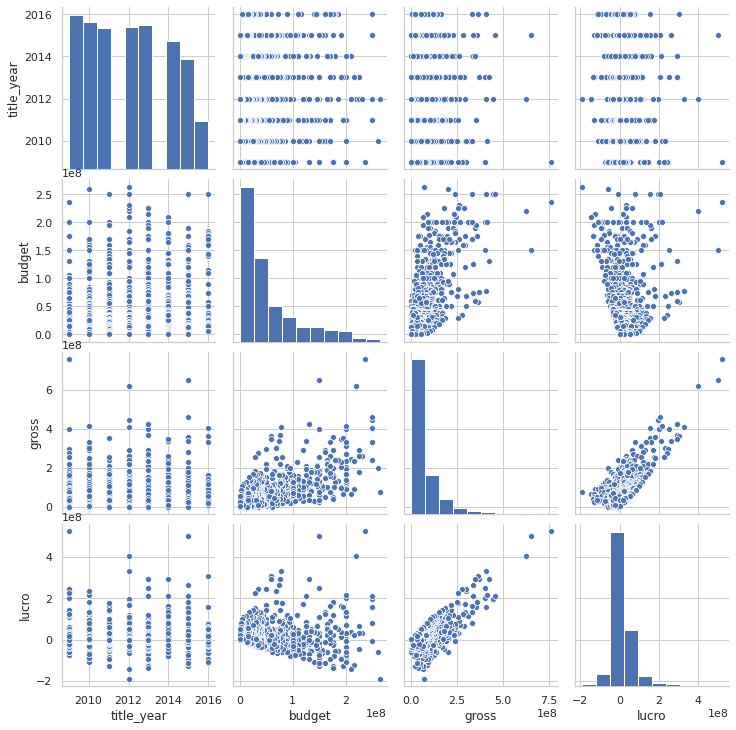

In [0]:
lucros_filmes_mais_recentes = imdb_usa.query("title_year >= 2009").dropna()
sns.pairplot(data = lucros_filmes_mais_recentes[["title_year", "budget", "gross", "lucro"]])

Dificil entender as interpolações de graficos distintos por eixos porém observando os extremos principalmente quando o ano dos filmes é um dos eixos compreendemos as variações nos lucros do cinema americano. Mas acredito que um background do assunto é necessário.

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [0]:
filmes_depois_virada_milenio = imdb_usa.query("title_year >= 2000").dropna()
filmes_depois_virada_milenio[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.00,0.70,0.77,0.12
budget,0.70,1.00,0.09,0.15
lucro,0.77,0.09,1.00,0.04
title_year,0.12,0.15,0.04,1.00


O ano de produção dos filmes (após ano 2000) tem correlação com o lucro tendendo a zero, ou seja sem impacto um no outro. Porém a bilheteria tem alta correlação com o orçamento dos filmes, provando o dominio dos blockbuster de super herois com altos lucros.

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

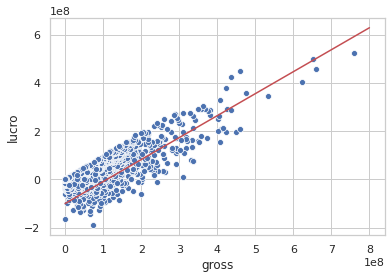

In [0]:
# sns.pairplot(imdb_usa, y_vars='lucro', x_vars=['budget', 'gross'], height=6, kind='reg')
sns.scatterplot(x="gross", y="lucro", data = imdb_usa[['gross', 'lucro']])
sns.lineplot(x=[0,800000000], y=[-100000000,630000000], color='r')

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


In [0]:
imdb_usa[["gross", "budget", "imdb_score"]].corr()

,gross,budget,imdb_score
gross,1.00,0.65,0.26
budget,0.65,1.00,0.08
imdb_score,0.26,0.08,1.00


In [0]:
votos_por_ano = imdb_usa.groupby('title_year')['num_voted_users'].mean()
imdb_usa_votos_por_ano = imdb_usa.join(votos_por_ano, on='title_year', rsuffix='rs')
imdb_usa_votos_por_ano.rename(columns={'num_voted_usersrs': 'votos_por_ano'}, inplace=True)
imdb_usa_votos_por_ano.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro,votos_por_ano
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000,"523,505,847.00","90,459.21"
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0,"9,404,152.00","105,898.24"
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000,"198,130,642.00","116,836.91"
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,"73,058,679.00",Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.00,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.00,English,USA,PG-13,"263,700,000.00","2,012.00",632.00,6.60,2.35,24000,"-190,641,321.00","116,836.91"
6,Color,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.00,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,"1,902.00",English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0,"78,530,303.00","105,898.24"


In [0]:
imdb_usa_votos_por_ano[['title_year', 'votos_por_ano']].corr()

,title_year,votos_por_ano
title_year,1.00,0.14
votos_por_ano,0.14,1.00


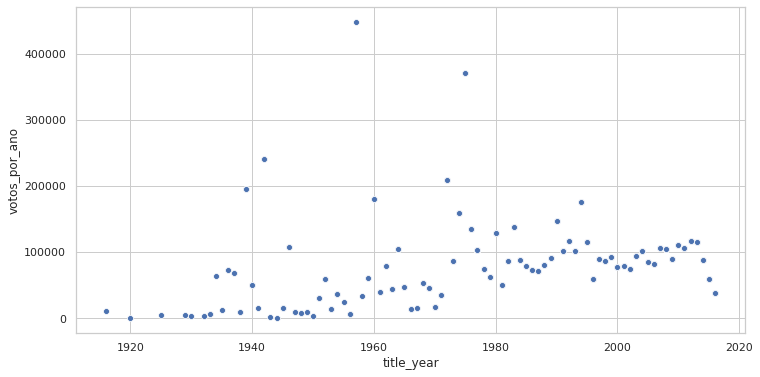

In [0]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='title_year', y='votos_por_ano', data=imdb_usa_votos_por_ano)

A nota média de avaliação tem alguma correlação com a bilheteria dos filmes. A justificativa deve ser que as pessoas vão avaliar os filmes que são populares e lançamentos. O ano de avaliação dos filmes tem baixa correlação com o número de avaliações, pois estas estão bem distribuidas pelos dados.

# Desafios Aula 04

## Lendo os Dados do ENEM 2018

In [0]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [0]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [0]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [0]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


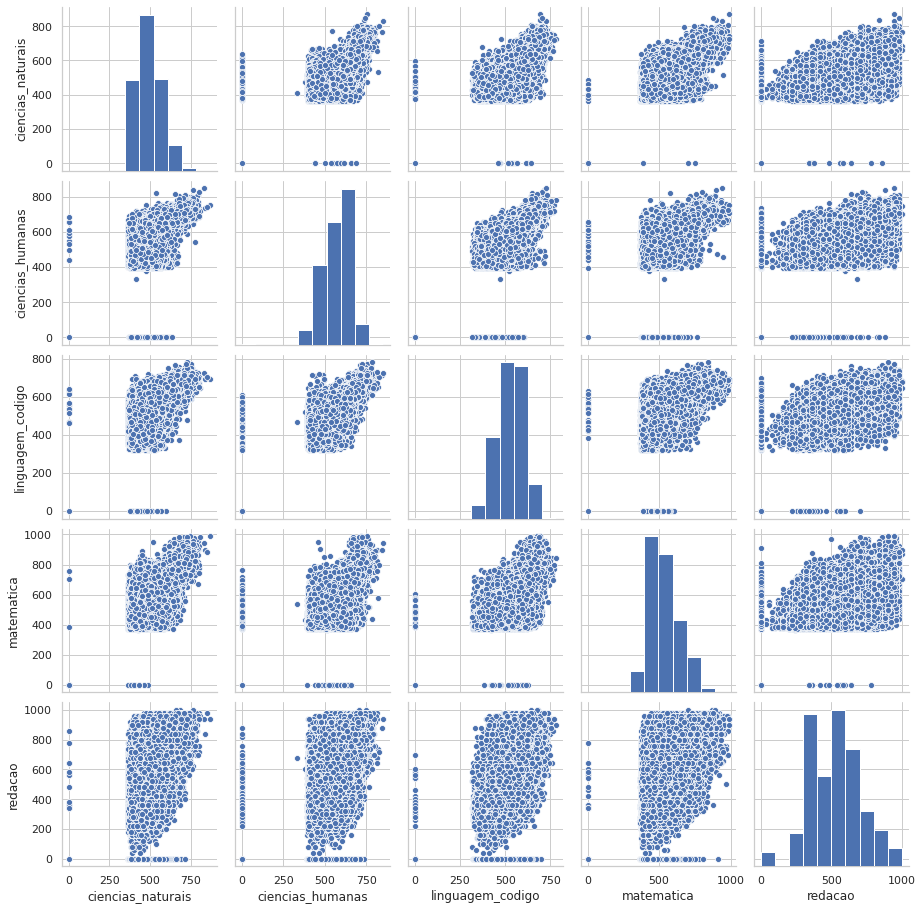

In [0]:
sns.pairplot(dados_notas)

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [0]:
# Dados do dicionário do ENEM
faltou = 0
presente = 1
eliminado = 2

dados_presencas = dados.copy()

dados_presencas.loc[dados['TP_PRESENCA_CN'].isin([faltou, eliminado]), 'NU_NOTA_CN'] = 0
dados_presencas.loc[dados['TP_PRESENCA_CH'].isin([faltou, eliminado]), 'NU_NOTA_CH'] = 0
dados_presencas.loc[dados['TP_PRESENCA_LC'].isin([faltou, eliminado]), 'NU_NOTA_LC'] = 0
dados_presencas.loc[dados['TP_PRESENCA_MT'].isin([faltou, eliminado]), 'NU_NOTA_MT'] = 0
dados_presencas.loc[dados['TP_STATUS_REDACAO'].isin([faltou, eliminado]), 'NU_NOTA_REDACAO'] = 0

dados_presencas[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.00,0.00,0.00,0.00,nan
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,0.00,0.00,0.00,0.00,nan


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

In [0]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


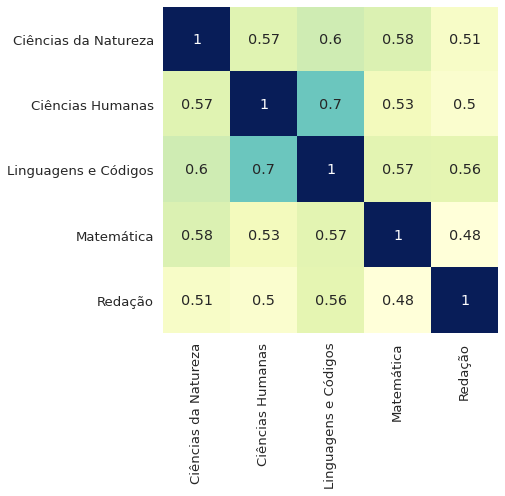

In [0]:
sns.set(font_scale=1.2)

labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

plt.figure(figsize=(6, 6))
ax = sns.heatmap(
    corr,
    annot=True,
    cmap="YlGnBu",
    cbar=False,
    xticklabels=labels,
    yticklabels=labels,
)

plt.show()

sns.set()

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [0]:
def conta_acertos(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')

    if (type(respostas) != str or type(gabarito) != str):
        return 0

    return sum(a==b for a, b in zip(respostas, gabarito))

In [0]:
dados_acertos = dados_presencas.copy()

dados_acertos['NU_RESPOSTAS_CORRETAS_CN'] = dados_acertos.apply(conta_acertos, materia='CN', axis=1)
dados_acertos['NU_RESPOSTAS_CORRETAS_CH'] = dados_acertos.apply(conta_acertos, materia='CH', axis=1)
dados_acertos['NU_RESPOSTAS_CORRETAS_LC'] = dados_acertos.apply(conta_acertos, materia='LC', axis=1)
dados_acertos['NU_RESPOSTAS_CORRETAS_MT'] = dados_acertos.apply(conta_acertos, materia='MT', axis=1)

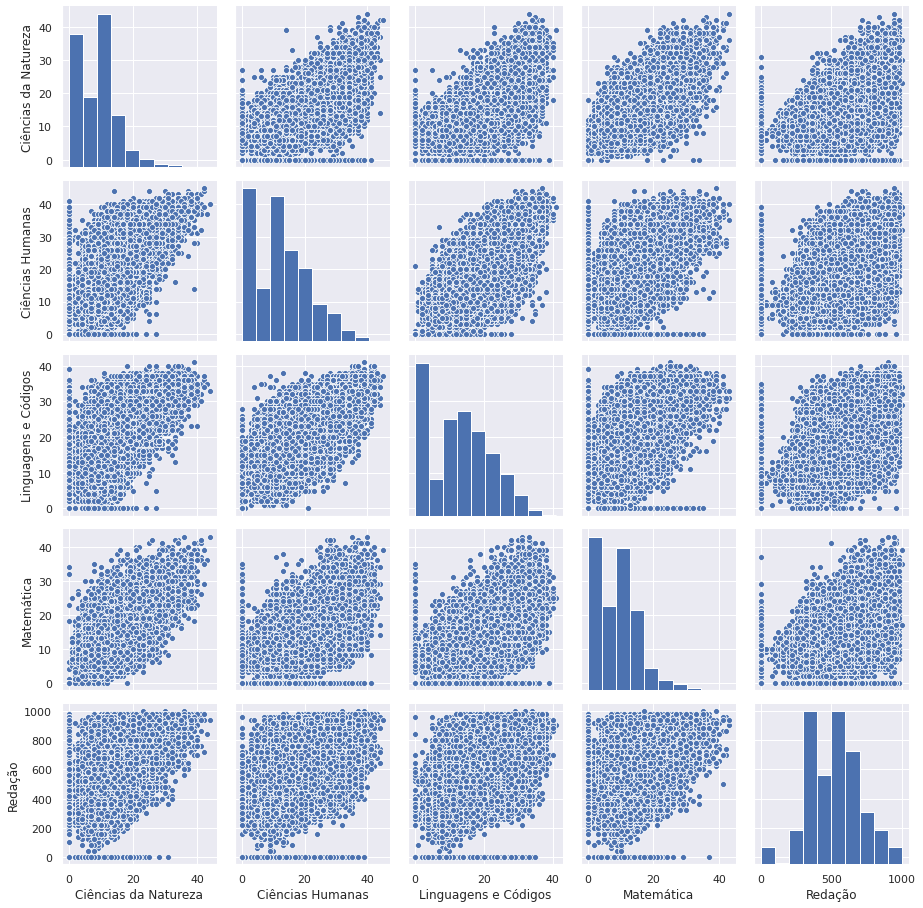

In [0]:
num_questoes_acertadas = dados_acertos[['NU_RESPOSTAS_CORRETAS_CN', 'NU_RESPOSTAS_CORRETAS_CH', 'NU_RESPOSTAS_CORRETAS_LC', 'NU_RESPOSTAS_CORRETAS_MT', 'NU_NOTA_REDACAO']]
num_questoes_acertadas.columns = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

sns.set()
sns.pairplot(num_questoes_acertadas)

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [0]:
# Seguindo a dica da Thais
import numpy as np

dados_removidos_zeros = dados_acertos[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].replace(0, np.nan).dropna()
dados_removidos_zeros.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagens_codigo', 'matematica', 'redacao']
dados_removidos_zeros.head()

,ciencias_naturais,ciencias_humanas,linguagens_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [0]:
def corrige_questoes(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')
    
    return pd.Series([int(a==b) for a, b in zip(respostas, gabarito)])

In [0]:
# Analisando a prova azul de Ciências da Natureza
prova_cn_azul = dados.query('CO_PROVA_CN == 447')

matriz_acertos = prova_cn_azul.apply(corrige_questoes, materia='CN', axis=1)
matriz_acertos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
15,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
137808,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0
137821,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
137834,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


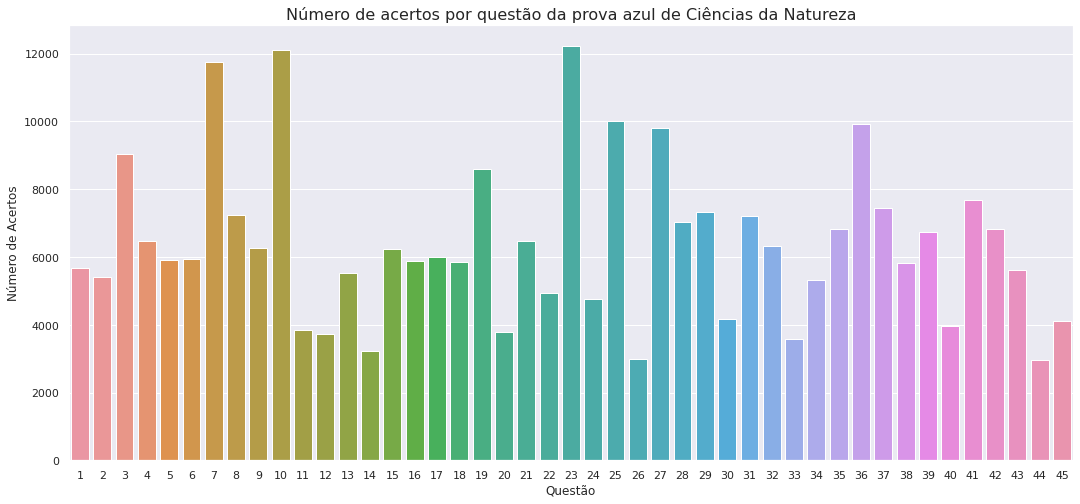

In [0]:
total_acertos_por_questao = pd.DataFrame(matriz_acertos.sum())
total_acertos_por_questao.reset_index(inplace=True)
total_acertos_por_questao.columns = ['Questão', 'Número de Acertos']
total_acertos_por_questao['Questão'] = total_acertos_por_questao['Questão'] + 1

plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Questão', y='Número de Acertos', data=total_acertos_por_questao)

ax.set_title('Número de acertos por questão da prova azul de Ciências da Natureza', fontsize=16)

plt.show()

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

Segundo Daniella Hansson (SERPRO), a LGPD (Lei Geral de Proteção de Dados) tira a segurança da informação do patamar de 'boas práticas' e a remete diretamente à nossa mesa como uma obrigação legal. Então, a ética deve ser considerada e incluída em todas as sete etapas do ciclo de vida dos dados. Não somente aos profissionais de Analytics.

Ciente disso existem empresas investindo cada vez mais em seus departamentos de CDO (Chief Data Office) e muitas já avançadas em programas de compliance regulatório. 

A falta de ética na ciência de dados apresentam casos recentes e sujos como o Cambridge Analytica / Facebook que manipularam dados de usuários para fins políticos e influência digital na vida das pessoas com impactos na geopolitica mundial. (#fakenews #elenão)

Para mais sobre o caso e como uma parcela da indústria da tecnologia está usando nossos dados contra nossos interesses e segurança, recomendo o documentário "Privacidade Hackeada" (Netflix) e o livro "Manipulados", publicado pela Harper Collins Brasil.

Trabalhando como desenvolvedor de sistemas na DATAPREV, empresa federal que salvaguarda dados sensiveis de muitos brasileiros, noto a segurança da informação e proteção aos dados/metadados manipulados como uma politica constante que envolve todo o corpo funcional e ambientes computacionais. Além do valor de negócio e inteligência competitiva que permitem criar e manter soluções tecnológicas confiaveis como as disponibilizadas (Auxilio Emergencial) em periodo de pandemia juntamente a Caixa Federal.   

Politicas de privacidade que dão valor ao negócio e inteligência competitiva que permitem criar e manter soluções tecnológicas confiaveis como as disponibilizadas em periodo de pandemia e isolamento social (Auxilio Emergencial) juntamente a Caixa Federal. 

Dados previdenciários tem valor agregado grande para empresas diversas que oferecem de emprestimos consignados até dados pessoais para crimes diversos (falsidade ideológica, etc). Por isso, toda a segurança tecnológica aplicada de ponta-a-ponta ainda assim está suscetível a engenharia social para fins ilícitos. Para tal, a LGPD vem estabelecer em lei boas práticas para a governça de dados em orgãos públicos e empresas privadas.

Inclusive conversei no meu podcast DesorienTech com o cientista de dados Gerson Vasconcelos (Hotmart) sobre os desafios e as oportunidades no mercado de dados.

http://brunovasconcelos.me/2019/11/19/podcast-mercado-dados/

Portanto, acompanho com interesse o futuro do mercado de dados e como machine learning pode ser aplicada sob datasets públicos e privados garantindo a integridade, privacidade e principalmente a igualdade social em algoritmos para tomadas de decisões. 

Finalizando, cito novamente Daniella Hansson: "***O verdadeiro poder dos dados e análises é a capacidade de apresentar fatos, números e verdades de pessoas reais e, como qualquer fonte desta magnitude, pode se tornar corrompível.***"

Fontes:

http://www.infoq.com/br/articles/privacy-attacks-machine-learning-models/

http://www.serpro.gov.br/lgpd/noticias/2019/tratamento-etico-dados-pessoais-ciencia-data-science

http://portal.dataprev.gov.br/dataprev-conta-com-novo-processo-de-protecao-de-dados-para-seus-data-centers

http://portal.dataprev.gov.br/auxilio-emergencial-dataprev-libera-mais-354-milhoes-de-solicitacoes

http://www.b9.com.br/shows/braincast/braincast-337-lei-geral-de-protecao-de-dados/

http://hipsters.tech/lgpd-lei-geral-de-protecao-de-dados-hipsters-174/

# Desafios Aula 05

## Treinando o Modelo e Fazendo Predições

In [0]:
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [0]:
y_adivinhar = dados_notas['linguagem_codigo']
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [0]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
30213,524.70,509.30,496.90,620.00
83439,501.40,609.00,532.00,460.00
56490,544.40,649.60,592.80,560.00
135214,415.70,541.20,461.60,560.00
55431,405.50,592.00,571.60,520.00


In [0]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]

array([486.66331109, 540.37793322, 478.79488436, 452.0140805 ,
       533.06419739])

In [0]:
y_teste[:5]

41528   420.20
81918   545.60
22786   518.10
17935   539.20
70617   536.90
Name: linguagem_codigo, dtype: float64

In [0]:
mean_squared_error(y_teste, predicoes_notas_linguagem)

2147.83

In [0]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)

In [0]:
# Erro quadrático médio

from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_notas_linguagem)

4134.88

In [0]:
# O MSE, sigla em inglês para essá métrica, é uma medida que quanto mais perto de zero melhor. Veja o resultado quando calculamos o MSE de dois vetores iguais:

mean_squared_error(y_teste, y_teste)

0.00

In [0]:
# Classificação dos dados por um método Dummy.

from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5193.54

## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

In [0]:
modelo = LinearSVR(C=10, max_iter=10000)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=10, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
predicoes_linguagem_parametros_variaveis = modelo.predict(x_teste)
predicoes_linguagem_parametros_variaveis[:5]

array([464.97195191, 522.16635904, 463.32905272, 446.49127248,
       507.64443977])

In [0]:
y_teste[:5]

41528   420.20
81918   545.60
22786   518.10
17935   539.20
70617   536.90
Name: linguagem_codigo, dtype: float64

In [0]:
mean_squared_error(y_teste, predicoes_linguagem_parametros_variaveis)

2706.49

Realmente existe pouca regularização usando o modelo LinesSVR e aumentando ou diminuindo os valores do parametro C ou maximo de interações no conjunto de treinamento para predição. O resultado não melhorou usando esse modelo de regressão (ou eu não consegui melhores resultados). 

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Use a média das notas das 4 provas como input do input e plote um gráfico com a previsão e valores reais (Igual ao gráfico sugerido pelo Allan em aula)

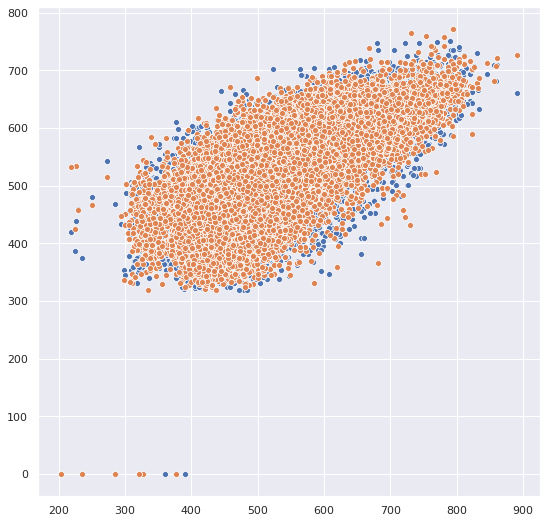

In [0]:
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)

plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste.mean(axis = 1).values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste.mean(axis = 1).values, y=y_teste.values)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

In [0]:
x_removido_zero = dados_removidos_zeros[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
y_removido_zero = dados_removidos_zeros['linguagens_codigo']

x_removido_zero_treino, x_removido_zero_teste, y_removido_zero_treino, y_removido_zero_teste = train_test_split(x_removido_zero, y_removido_zero, random_state=43267)

modelo_removido_zero = LinearSVR(C=10, max_iter=10000)
modelo_removido_zero.fit(x_removido_zero_treino, y_removido_zero_treino)
predicoes_removido_zero_notas_linguagem = modelo_removido_zero.predict(x_removido_zero_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
mean_squared_error(y_removido_zero_teste, predicoes_removido_zero_notas_linguagem)

2180.79

In [0]:
modelo_removido_zero = DecisionTreeRegressor()
modelo_removido_zero.fit(x_removido_zero_treino, y_removido_zero_treino)
predicoes_removido_zero_notas_linguagem = modelo_removido_zero.predict(x_removido_zero_teste)

In [0]:
mean_squared_error(y_removido_zero_teste, predicoes_removido_zero_notas_linguagem)

4008.42

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões

As previsões baseadas no modelo de regressão LinearSVR se mostraram bastante inconclusivas para o conjunto de dados analisados, onde pretendiamos inferir as notas de linguagens e códigos a partir das outras notas (incluindo nota de redação que dificilmente se relaciona). Mesmo configurando parametros e aleatoriedade do modelo, as métricas de erro calculadas foram altas e os gráficos utilizados não ajudaram a enxergar relações e predições.

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

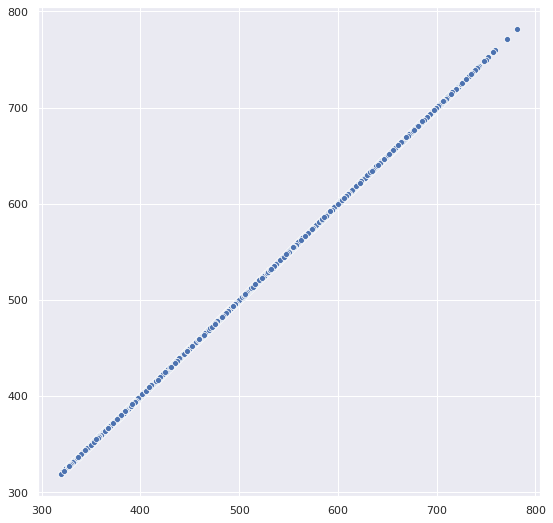

In [0]:
modelo = DecisionTreeRegressor()
modelo.fit(x_removido_zero_treino, y_removido_zero_treino)
predicoes_removido_zero_notas_linguagem = modelo.predict(x_removido_zero_treino)

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_removido_zero_treino.values, y=predicoes_removido_zero_notas_linguagem)

In [0]:
mean_squared_error(y_removido_zero_treino, predicoes_removido_zero_notas_linguagem)

0.00

Uma vez aplicado dados de treino para o modelo de aprendizagem as métricas de erro inexistem comparadas ao dataset de testes ao qual extraimos as previsões.